<a href="https://colab.research.google.com/github/pragneshrana/WorkSample/blob/main/ML_DL_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
- AI in Trading
    - Quantative Trading
    - Algorithmic trading
      - Breakout
      - Trend Following
      - Mean Reversion
      - Moving Average Crossover
      - Momentum Trading
      - Statistical Arbitrage
    - High Frequency Trading
    - Automated Trading
    

 - Reinforcement Learning   : Agents interacts with environment, learning to take actions to maximize cumulative reward.
Steps:
  - Data Process: normalization, imputation, feature engineering
  - State Representation : Price History, Volumne information, technical indicators, sentiment analysis
  - Action Space: Buying, Selling, Holding
  - Reward :  Portfolio Return, Risk-Adjusted metrics, Performance Indicators
  - Algorithms :  Deep Q Network, Proximal Policy Optimization, Advantage Actor-Critic
  - Training- Evaluation
  

## Deep learning  


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

symbol = 'INFY.NS'
start_date = '2022-01-01'
end_date = '2024-07-01'
yf.pdr_override() # <== that's all it takes :-)

stock_data = yf.download(symbol, start=start_date, end=end_date)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1887.750000,1914.050049,1887.750000,1898.449951,1786.142456,3329616
2022-01-04,1898.449951,1906.650024,1878.000000,1899.150024,1786.801147,3921999
2022-01-05,1900.000000,1902.900024,1840.000000,1844.650024,1735.525269,6995719
2022-01-06,1828.000000,1828.000000,1800.000000,1817.800049,1710.263672,6449205
2022-01-07,1815.449951,1836.000000,1806.800049,1814.300049,1706.970703,4834389
...,...,...,...,...,...,...
2023-12-19,1570.099976,1573.949951,1543.250000,1558.300049,1558.300049,4221721
2023-12-20,1565.050049,1583.500000,1530.000000,1536.400024,1536.400024,6592367
2023-12-21,1521.250000,1546.650024,1521.250000,1536.000000,1536.000000,5319038


In [ ]:

def preprocess_data(data):
    close_prices = data['Close'].values

    min_price = np.min(close_prices)
    max_price = np.max(close_prices)
    normalized_prices = (close_prices - min_price) / (max_price - min_price)

    return normalized_prices



In [ ]:

def build_model(input_shape, output_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(output_shape, activation='linear'))
    model.compile(optimizer=Adam(), loss='mse')
    return model


In [ ]:
def train_model(model, X_train, y_train, epochs=10):
    model.fit(X_train, y_train, epochs=epochs, verbose=1)


In [ ]:

def predict_action(model, state):
    action = model.predict(state)
    return action



In [ ]:
stock_data = yf.download(symbol, start=start_date, end=end_date)

preprocessed_data = preprocess_data(stock_data)

train_data = preprocessed_data[:int(0.8 * len(preprocessed_data))]
test_data = preprocessed_data[int(0.8 * len(preprocessed_data)):]

input_shape = (None, 1)
output_shape = 1


[*********************100%%**********************]  1 of 1 completed


In [ ]:
model = build_model(input_shape, output_shape)

X_train = np.expand_dims(train_data[:-1], axis=1)
y_train = np.expand_dims(train_data[1:], axis=1)

train_model(model, X_train, y_train, epochs=100)

X_test = np.expand_dims(test_data[:-1], axis=1)
y_test = np.expand_dims(test_data[1:], axis=1)


Epoch 1/100
13/13 [==============================] - 5s 5ms/step - loss: 0.2079
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1616
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1108
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0595
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0306
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0276
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0222
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0191
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0173
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 13/100
13/13 [=================

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Testing loss: {loss}')

actions = predict_action(model, X_test)


4/4 [==============================] - 1s 5ms/step - loss: 6.4591e-04
Testing loss: 0.0006459098076447845
4/4 [==============================] - 1s 4ms/step


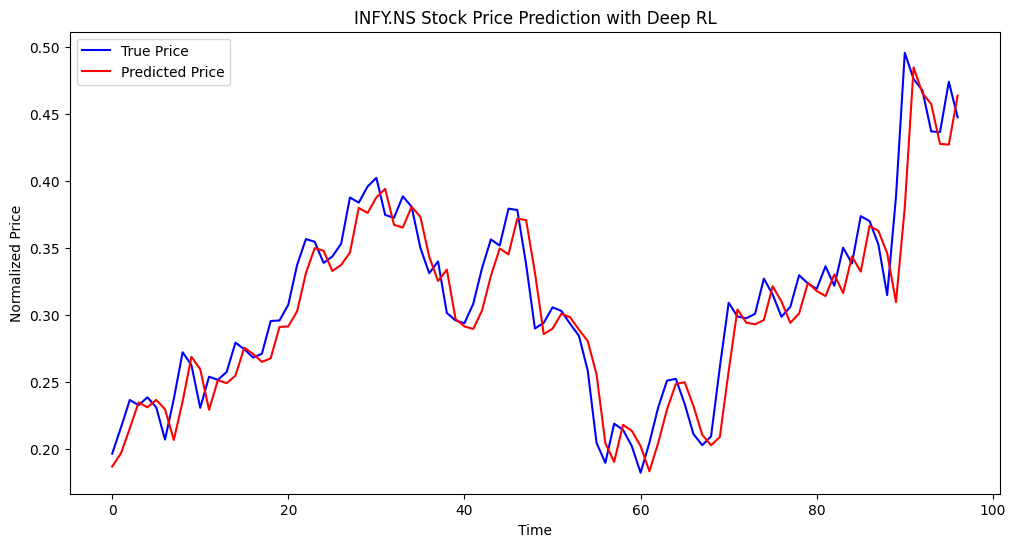

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data[1:], label='True Price', color='blue')
plt.plot(actions, label='Predicted Price', color='red')
plt.title(f'{symbol} Stock Price Prediction with Deep RL')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

## ARIMA & GARCH

In [1]:
!pip install arch
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.3 MB/s eta 0:00:00


ARIMA and GARCH models, the prediction formula can be expressed as a product of the predicted conditional mean  from ARIMA and the predicted conditional volatility from GARCH.

$y_t = \hat{Y}_t \times \hat{\sigma}_t$


Let's break down each part:

$\textbf{ARIMA Prediction (\(\hat{Y}_t\)):}
Y_t = c + \phi_1 Y_{t-1} + \varepsilon_t
$​


After fitting the ARIMA model, you get the predicted conditional mean for each time point.

$
\textbf{GARCH Prediction (\(\hat{\sigma}_t\)):}
\sigma_t^2 = \omega + \alpha_1 \varepsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2
$

$
\textbf{Combined Prediction Formula:}
y_t = \hat{Y}_t \times \hat{\sigma}_t
$

The GARCH model is used to predict the conditional volatility  and you can obtain the predicted conditional standard deviation
This formula represents the combined prediction of the stock price, considering both the predicted mean and volatility. The idea is that the volatility predicted by the GARCH model adjusts the predicted mean from the ARIMA model, reflecting the uncertainty or variability in the stock price.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model


In [3]:
# Step 1: Fetch Historical Stock Price Data
stock_symbol = "ITC"
start_date = "2022-01-01"
end_date = "2022-12-31"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
closing_prices = stock_data['Close']


[*********************100%%**********************]  1 of 1 completed


In [4]:
# Step 2: ARIMA Model for Price Prediction
arima_model = ARIMA(closing_prices, order=(5, 1, 0))  # Adjust order as needed
arima_results = arima_model.fit()
forecast_horizon = 10
arima_forecast = arima_results.get_forecast(steps=forecast_horizon).predicted_mean


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [5]:
# Step 3: GARCH Model for Volatility Prediction
returns = closing_prices.pct_change().dropna()
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()
garch_forecast = garch_results.forecast(horizon=forecast_horizon).variance.iloc[-1, :]



Iteration:      1,   Func. Count:      6,   Neg. LLF: 353.0772416726068
Iteration:      2,   Func. Count:     12,   Neg. LLF: 326.75921699002356
Iteration:      3,   Func. Count:     17,   Neg. LLF: 326.7592052286138
Iteration:      4,   Func. Count:     22,   Neg. LLF: 326.7591855230725
Iteration:      5,   Func. Count:     26,   Neg. LLF: 326.759185523074
Optimization terminated successfully    (Exit mode 0)
            Current function value: 326.7591855230725
            Iterations: 5
            Function evaluations: 26
            Gradient evaluations: 5


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.323e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [6]:
# Step 4: Combine ARIMA Forecast with GARCH Volatility
volatility_forecast = np.sqrt(garch_forecast.cumsum())

# Make sure the indices are aligned and have a datetime format
combined_forecast = arima_forecast.copy()
combined_forecast.index = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq=closing_prices.index.freq)

# Convert combined forecast to datetime index
combined_forecast = pd.Series(combined_forecast.values, index=combined_forecast.index)


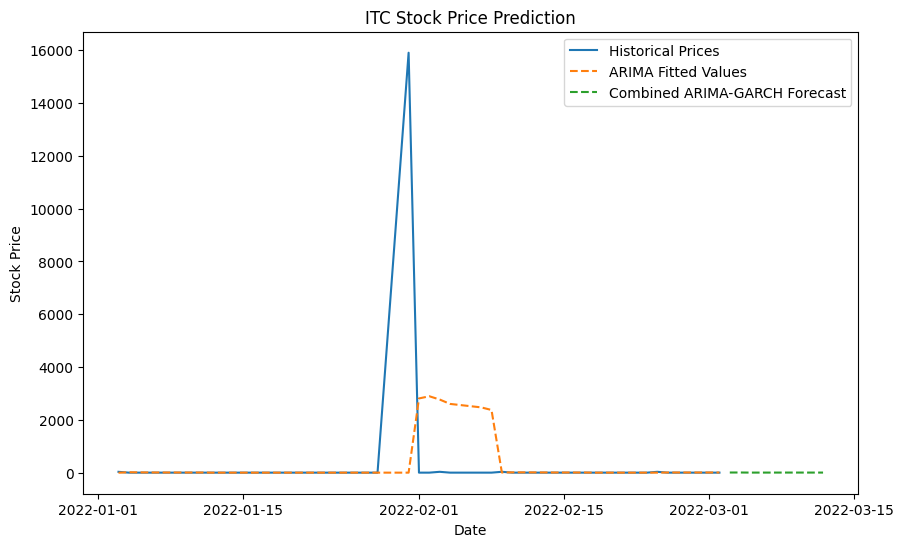

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(closing_prices, label='Historical Prices')
plt.plot(arima_results.fittedvalues, label='ARIMA Fitted Values', linestyle='--')
plt.plot(combined_forecast.index, combined_forecast, label='Combined ARIMA-GARCH Forecast', linestyle='--')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
